analysis of chattanooga bike data
python3

In [24]:
import pandas as pd

ERROR: Line magic function `%inline` not found.


In [6]:
b = pd.read_csv("bike_data.csv")

In [7]:
pd.set_option('display.max_columns', 80) 
b.head(3)

,SubscriberID,MemberType,TripDurationSec,BikeID,StartDay,StartDateTime,StartDate,StartTime,StartStationName,StartStationID,EndDay,EndDateTime,EndDate,EndTime,EndStationName,EndStationID
0,17963,Customer,802,C00026,Sunday,02/10/2013 05:48:00 AM,02/10/2013,05:48,200 River St Outdoor Chattanooga,1299,Sunday,02/10/2013 06:01:00 AM,02/10/2013,06:01,Market & E 4th Street,1307
1,25611,Subscriber,76112,C00188,Saturday,09/14/2013 08:35:00 PM,09/14/2013,20:35,100 Walnut St,1319,Sunday,09/15/2013 05:43:00 PM,09/15/2013,17:43,200 River St Outdoor Chattanooga,1299
2,18045,Subscriber,527,C00258,Friday,08/16/2013 11:13:00 PM,08/17/2013,23:13,ML King Blvd & Lindsay St,1327,Friday,08/16/2013 11:22:00 PM,08/17/2013,23:22,ML King Blvd & Lindsay St,1327


In [8]:
len(b)

126738

In [9]:
b.dtypes

SubscriberID         int64
MemberType          object
TripDurationSec      int64
BikeID              object
StartDay            object
StartDateTime       object
StartDate           object
StartTime           object
StartStationName    object
StartStationID       int64
EndDay              object
EndDateTime         object
EndDate             object
EndTime             object
EndStationName      object
EndStationID         int64
dtype: object

extract station names and IDs
*get locations for routing in google maps 


In [10]:
stations = b['StartStationName'].unique()
for s in stations:
    print(s)

200 River St Outdoor Chattanooga
100 Walnut St
ML King Blvd & Lindsay St
Broad St & W 4th St
1216 Broad St
100 Manufacturers Rd
Carter St & W 12th St
500 Georgia Ave
215 Broad St
Hubert Fry Center Tennessee Riverpark
Chestnut St & Riverfront Pkwy
Market St & Cowart St
800 E 8th St
Market St & E 14th St
Market & E 4th Street
E Main St & Rossville Ave
High St & E 2nd St
Market St & ML King Blvd
Power Alley & Riverfront Pkwy
Broad St & W 10th St
1826 Carter St
Oak St & University Greenway
Broad St & W 6th St
W Main St & Cowart St
Douglas St
Broad St & W 8th St
Market St & W 12th St
Pine St. & W. 6th St.
Oak St & Houston St
E 5th St & Collins St
301 Manufacturers Rd
SpringHill Suites
McCallie Ave & Lindsay St
LN1
Alex7
PBSCTEST
NYC1
Naesta1


* questions
  1. how many bike checkouts per time unit throughout the week
  2. how man returns per time unit throughout week
  3. what routes are used more often?
  4. what businesses are close to each station?
    * score by proximity?
    * by type of business? attraction?
  5. what parking is nearby?
  6. station utilization
  7. individual bike utilization
  8. how do we predict where there is a shortage of bikes?
  
* stations
  * distance between each https://developers.google.com/maps/documentation/distance-matrix/intro
  

* make usable map
  1. Convert station id and station name into usable addresses for google maps
  2. put in csv uploadable to google maps
  3. create shared map in google maps
  4. figure out how to use KML file to make fancy icons that can show bike usage
  
  

In [27]:
stationIDs = b[['StartStationID','EndStationID']]

In [28]:
stationIDs

,StartStationID,EndStationID
0,1299,1307
1,1319,1299
2,1327,1327
3,1343,1349
4,1349,1349
5,1297,1319
6,1299,1299
7,1297,1301
8,1299,1319
9,1319,1313


In [13]:
melt=pd.melt(b,id_vars='StartStationName')

In [14]:
b.describe()

,SubscriberID,TripDurationSec,StartStationID,EndStationID
count,126738.000000,1.267380e+05,126738.000000,126738.000000
mean,31023.762991,1.571647e+04,1325.803374,1325.584182
std,11942.540808,3.810332e+06,26.464226,26.529067
min,11077.000000,0.000000e+00,1297.000000,1297.000000
25%,20489.000000,5.350000e+02,1305.000000,1305.000000
50%,31463.000000,1.391000e+03,1319.000000,1319.000000
75%,40807.000000,2.707000e+03,1341.000000,1341.000000
max,51496.000000,1.351370e+09,1428.000000,1428.000000


In [15]:
bbystart = b.groupby('StartStationName')

In [18]:
b['TripDurationSec']

0           802
1         76112
2           527
3           465
4          7644
5           707
6          2160
7           324
8          1494
9          4641
10         1540
11         3630
12          420
13         2166
14            2
15          430
16         1275
17            7
18            2
19           60
20        17119
21          421
22          795
23          511
24          330
25          459
26         2884
27          235
28          101
29         1611
          ...  
126708      673
126709      309
126710       18
126711      557
126712     3361
126713      697
126714      528
126715        2
126716     2242
126717     9608
126718     3067
126719     6232
126720     2271
126721     3038
126722     2110
126723     1629
126724     2976
126725      307
126726     3557
126727     1682
126728      896
126729      659
126730      307
126731     3627
126732     6754
126733     3281
126734      620
126735     7660
126736      628
126737        9
Name: TripDurationSec, d

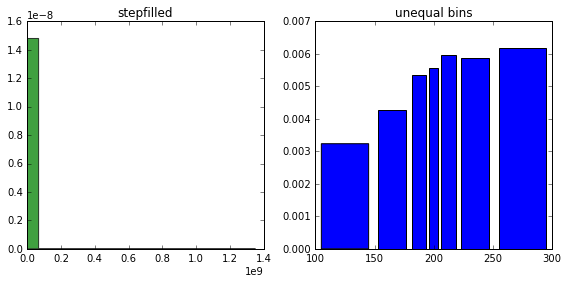

In [25]:
"""
Demo of the histogram (hist) function with different ``histtype`` settings.

* Histogram with step curve that has a color fill.
* Histogram with with unequal bin widths.

"""
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


#mu = 200
#sigma = 25
#x = mu + sigma*np.random.randn(10000)
x = b['TripDurationSec']

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

In [23]:
"""
Demo of the histogram (hist) function with different ``histtype`` settings.

* Histogram with step curve that has a color fill.
* Histogram with with unequal bin widths.

"""
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


x = b['TripDurationSec']/60 #convert to minutes

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 4))

ax0.hist(x, 20, normed=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')

# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, normed=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')

plt.tight_layout()
plt.show()

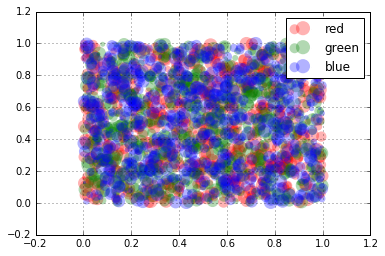

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import rand


x, y = rand(2, n)
scale = 200.0 * rand(n)
plt.scatter(x, y, c=color, s=scale, label=color,
            alpha=0.3, edgecolors='none')

plt.legend()
plt.grid(True)

plt.show()